> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [ ]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [ ]:
def corr2d(X: np.array, K: np.array) -> np.array:
  x_height, x_width = X.shape
  k_height, k_width = K.shape
  output_height = x_height - k_height + 1
  output_width = x_width - k_width + 1

  # Initialize the output matrix
  output = np.zeros((output_height, output_width))

  # Perform cross-correlation
  for i in range(output_height):
      for j in range(output_width):
          output[i, j] = np.sum(X[i:i+k_height, j:j+k_width] * K)

  return output
  # no padding for now and assume stride = 1

  pass


In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(X.shape,K.shape)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

(3, 3) (2, 2)
[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [ ]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array:
    x_depth, x_height, x_width = X.shape
    k_depth, k_height, k_width = K.shape
    output_height = x_height - k_height + 1
    output_width = x_width - k_width + 1

    # Initialize the output matrix
    output = np.zeros((output_height, output_width))

    # Perform cross-correlation
    for i in range(output_height):
        for j in range(output_width):
            for d in range(x_depth):
                output[i, j] += np.sum(X[d, i:i+k_height, j:j+k_width] * K[d])

    return output

   

[link text](https://)

In [ ]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 
print(new_X)
print(new_K)
print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 1.  2.  3.]
  [ 4.  5.  6.]
  [ 7.  8.  9.]]

 [[ 2.  3.  4.]
  [ 5.  6.  7.]
  [ 8.  9. 10.]]]
[[[0. 1.]
  [2. 3.]]

 [[1. 2.]
  [3. 4.]]

 [[2. 3.]
  [4. 5.]]]
new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [ ]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    
    num_in_channels, n_h, n_w = X.shape
    num_out_channels, num_in_channels_k, k_h, k_w = K.shape
    assert num_in_channels == num_in_channels_k, "Number of input channels must match in X and K"

    o_h = n_h - k_h + 1
    o_w = n_w - k_w + 1

    # Initialize the output matrix
    output = np.zeros((num_out_channels, o_h, o_w))

    # Perform cross-correlation
    for o_c in range(num_out_channels):
        for i_c in range(num_in_channels):
            for i in range(o_h):
                for j in range(o_w):
                    output[o_c, i, j] += np.sum(X[i_c, i:i+k_h, j:j+k_w] * K[o_c, i_c])

    return output# X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    

In [ ]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

Computatinal Benefits:-Larger stride reduces the number of computations required in convolutional operations, leading to faster processing and reduced memory usage.
Statistical Benefits:-Larger stride increases the receptive field of the network,allowing for larger context and potentially better feature extraction in convolutional neural network.

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [ ]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [ ]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [ ]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    pool_height, pool_width = K
    output_height = X.shape[0] // pool_height
    output_width = X.shape[1] // pool_width

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            start_i = i * pool_height
            start_j = j * pool_width
            end_i = start_i + pool_height
            end_j = start_j + pool_width
            output[i, j] = np.max(X[start_i:end_i, start_j:end_j])

    return output

In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


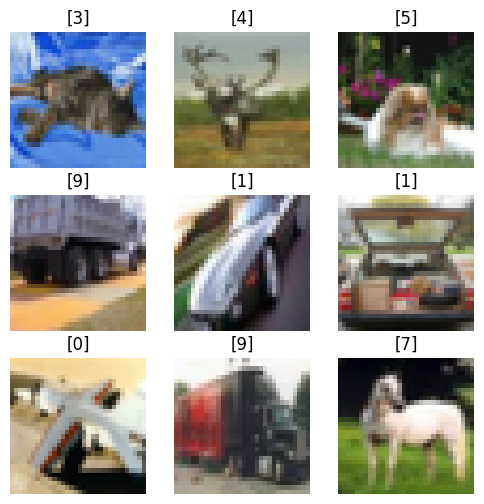

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

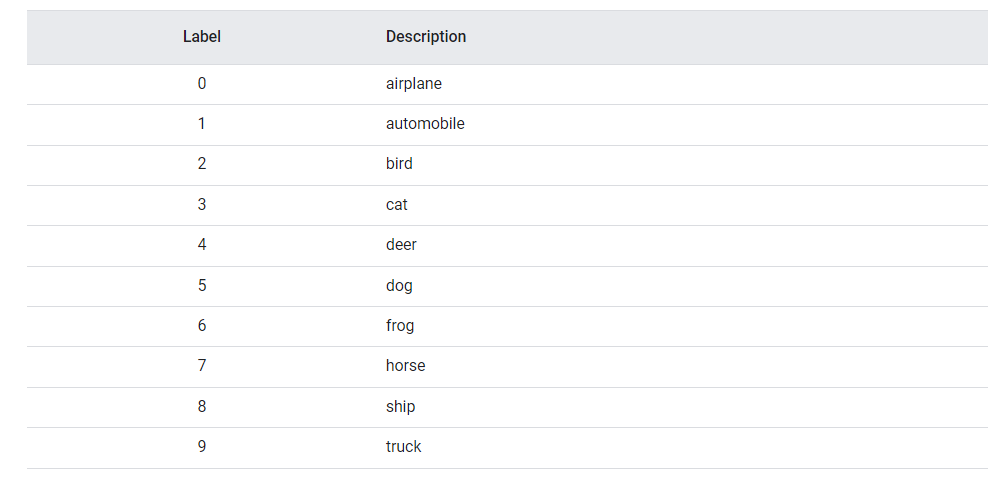

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:
"""
Adam is a special algorithm that helps make machine learning models better. It combines two things called adaptive learning rates and momentum. It is like a smarter version of another algorithm
 called stochastic gradient descent.

 Adam adjusts the learning rates for different parts of the model based on their past gradients. It learns from its mistakes and figures out how fast or slow each part should learn.
  This helps the model learn quickly and accurately.

To update the model Adam looks at the past gradients and calculates their averages. It uses these averages to decide how to change the model's parameters. 
Adam also fixes a small problem that happens at the beginning of training.

There a lot of  benefits of using it . It can handle different sizes of parameters and help the model learn faster.
 It also uses momentum, which helps the optimization process move smoothly and avoid getting struck  in bad places. Adam is also good at handling big and complicated datasets.

All in all  Adam is a popular thing because it works well and is efficient. But its performance can vary depending on the task and data. 
Sometimes tweaking its settings or trying different algorithms can give even better results.

'\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:\n'

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 17s 5ms/step - loss: 2.6780 - accuracy: 0.1075 - val_loss: 2.3033 - val_accuracy: 0.1051
Epoch 2/10
875/875 [==============================] - 5s 5ms/step - loss: 2.2983 - accuracy: 0.1037 - val_loss: 2.3026 - val_accuracy: 0.0990
Epoch 3/10
875/875 [==============================] - 5s 6ms/step - loss: 2.3020 - accuracy: 0.0984 - val_loss: 2.3023 - val_accuracy: 0.0990
Epoch 4/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3014 - accuracy: 0.1011 - val_loss: 2.3019 - val_accuracy: 0.1054
Epoch 5/10
875/875 [==============================] - 6s 7ms/step - loss: 2.3012 - accuracy: 0.1010 - val_loss: 2.3061 - val_accuracy: 0.1054
Epoch 6/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3017 - accuracy: 0.0994 - val_loss: 2.3039 - val_accuracy: 0.0993
Epoch 7/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3006 - accuracy: 0.1028 - val_loss: 2.3053 - val_accuracy: 0.0940
Epoch 8/10
875/8

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: 
"""
Validation accuracy is a way to check how well a machine learning model performs on new data that it has never seen before. 
It is like giving the model a test to see if it can do a good job on new problems. We do this by comparing the model's  prediction to the correct answers.
 If the model gets a lot of answers right, it means it is  doing well. If it gets a lot of answers wrong, it means it is  not doing so well. 
 The validation accuracy helps us decide which model is the best and how well it will work in the real. It is  like a grade for the model's performance. 
 The higher the accuracy, the better the model is at solving new problems.

' \nWrite about validation accuracy in 100 words.\n\nAnswer: \n'

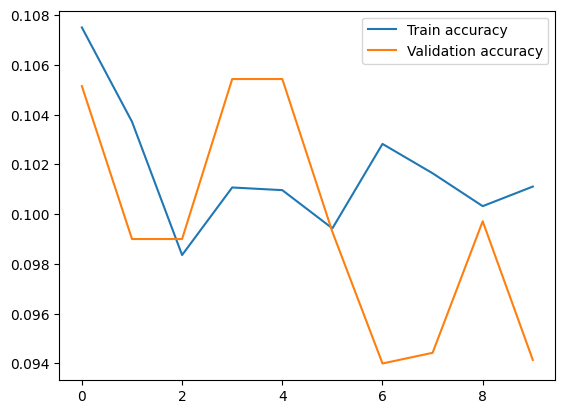

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 7s 5ms/step - loss: 2.1060 - accuracy: 0.2858 - val_loss: 1.7066 - val_accuracy: 0.3764
Epoch 2/20
875/875 [==============================] - 5s 6ms/step - loss: 1.6188 - accuracy: 0.4071 - val_loss: 1.5544 - val_accuracy: 0.4309
Epoch 3/20
875/875 [==============================] - 4s 5ms/step - loss: 1.5041 - accuracy: 0.4610 - val_loss: 1.4691 - val_accuracy: 0.4720
Epoch 4/20
875/875 [==============================] - 5s 6ms/step - loss: 1.4150 - accuracy: 0.4944 - val_loss: 1.4217 - val_accuracy: 0.4983
Epoch 5/20
875/875 [==============================] - 5s 5ms/step - loss: 1.3236 - accuracy: 0.5299 - val_loss: 1.3860 - val_accuracy: 0.5131
Epoch 6/20
875/875 [==============================] - 4s 5ms/step - loss: 1.2501 - accuracy: 0.5529 - val_loss: 1.3887 - val_accuracy: 0.5093
Epoch 7/20
875/875 [==============================] - 5s 6ms/step - loss: 1.2016 - accuracy: 0.5741 - val_loss: 1.4212 - val_accuracy: 0.5121
Epoch 

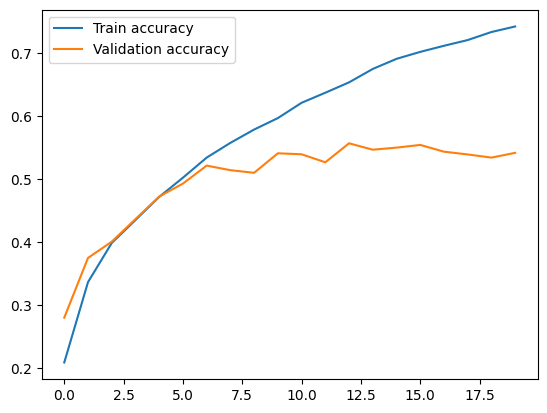

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

"\nDid our model improved??\nAre we done with the job?\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy?\n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n"

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: 
"""
Overfitting means when we train a model with so much data and it starts learning from the noise and inaccurate data entries in our data set.And when testing with test data results in High Variance.
Then the model does not categorize tha data correctly, because of too many details and noise.All in all in overfitting model overlearns from training data leading to poor performance on new data set.
Undefitting means when a model cannot capture the predefined trend of the data in other words it only performs well on training data but performs poorly on testing data.It happens when we have less 
data to build an accurate model and when we try to build a linear model with few non linear data.In other words, model is too simple that it fails to capture patterns resulting in poor performance
 on training and new data. 

SyntaxError: ignored

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: 
"""
Regularization techniques in machine learning are methods used to prevent overfitting and improve the generalization performance of machine learning models. 
 Regularization helps to control the complexity of the model by adding additional constraints or penalties to the learning process.

There are various regularization techniques used in machine learning. One of the technique is L1 regularization , which adds a penalty to the model's loss function based on the 
absolute values of the model's weights. This encourages feature selection, as it tends to drive some weights to become exactly zero.

Another  technique is L2 regularization which adds a penalty to the loss function based on the squared magnitudes of the model's weights.
 This encourages smaller weights and helps to prevent the model from relying too heavily on any one feature.

Other regularization techniques include dropout, early stopping, and data augmentation. Dropout randomly deactivates units during training to reduce reliance on specific features. 
Early stopping stops the training process before overfitting occurs by monitoring the model's performance on a validation set. 
And Data augmentation means  creating modified versions of existing data samples to increase diversity and reduce overfitting.

Regularization techniques are essential in machine learning because they help to balance the trade-off between model complexity and generalization performance.
 By controlling the model's complexity and encouraging simpler and more robust representations, regularization techniques improve the model's ability to perform well on unseen data 
 and make it more reliable and applicable to real-world problems.

'\nQuestion: What are regularization techniques in machine learning?(200 words)\n\nAnswer: \n'

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: 
"""
The dropout layer is like a special tool we use in neural networks to make them better at learning. It helps us prevent overfitting where the network becomes too focused on specific things 
and does not work well on new, unseen data. In TensorFlow we have a special layer called the dropout layer that helps with this.

 dropout layer randomly deactivate some of the input units during training. It is  like turning off certain parts of the network temporarily. By doing it 
we make sure that the network does not rely too much on any one part and learns more general things. We want the network to learn different features and patterns not depend on a few specific ones.

Each unit has a chance of being kept or dropped out based on the  rate we set. The units are scaled to maintain their overall strength. By randomly dropping units, we add some randomness
 and encourage the network to learn more diverse things.

When we use the network to make predictions we do not  drop any units anymore but we adjust the weights of the dropout layer to match what we did during training. This makes sure the 
predictions are consistent.

By using dropout layer in TensorFlow, we can prevent overfitting, help the network generalize better, and make it more reliable for new data.
 It is  an important technique that is  used in many deep learning models to make them work better.

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: \n'

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: 
"""
L1 normalization, also known as L1 normalization or L1 normalization is a technique used to normalize vectors or feature representations by scaling them to have a unit L1 norm.
 The L1 norm of a vector is the sum of the absolute values of its elements.

For a vector x = [x1, x2, ..., xn], the L1 norm is calculated as:
||x||1 = |x1| + |x2| + ... + |xn|

L1 normalization is achieved by dividing each element of the vector by the L1 norm, resulting in a vector with a unit L1 norm. The L1 normalized vector is denoted as x' and is given by:
x' = [x1 / ||x||1, x2 / ||x||1, ..., xn / ||x||1]

In formula form, the L1 normalization of vector x can be expressed as:
x' = x / ||x||1
L1 normalization is a method commonly used in machine learning to give importance to different features or elements in a list. If we have a list of numbers representing different characteristics,
 like the age, height, and weight of people. L1 normalization helps us understand which features are more important and which ones we can ignore.

When we do L1 normalization we consider the absolute value of each number in the list.
We only look at their magnitudes. By doing this, we can see the relative importance of each feature.

L1 normalization also has another effect. It tends to make some of the features exactly zero. This means that for some characteristics they become unimportant and we can ignore them. 
This is when we want to focus on only the most relevant features and make our analysis or model simpler.
By using it we  can easily compare or combine different lists of numbers based on their importance and magnitudes. It helps us make better decisions and find patterns in the data.
 

'\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: \n'

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: 
"""
L2 normalization also known as Euclidean normalization is a method used to make vectors or feature representations have a similar scale. If we have have a list of numbers that represent something
 like the height, weight, and age of people. L2 normalization helps make these numbers more comparable and fair.

To do L2 normalization we first calculate something called the L2 norm. It is  a  value that tells us the overall magnitude of the numbers.
 And we  find this value by adding up the squares of each number, and then taking the square root of the sum.

then we divide each number in the list by the L2 norm. it will make sure that all the numbers are now scaled down and have a similar magnitude. It is  like putting them on the same playing field.
For a vector x = [x1, x2, ..., xn], the L2 norm is 
||x||2 = sqrt(x1^2 + x2^2 + ... + xn^2)

L2 normalization is achieved by dividing each element of the vector by the L2 norm, resulting in a vector with a unit L2 norm. The L2 normalized vector is denoted as x' and is given by:
x' = [x1 / ||x||2, x2 / ||x||2, ..., xn / ||x||2]

In formula form, the L2 normalization of vector x can be expressed as:
x' = x / ||x||2


By doing L2 normalization we  can compare or combine different lists of numbers more easily.
 It helps to remove any bias caused by the original magnitude of the numbers. This is important when we have features that vary a lot in size, so that we can treat them fairly.

L2 normalization is used in many areas of machine learning. It helps with preparing data, creating better features, and training models. It is  especially helpful in tasks like finding similar items,
 making recommendations, or building deep learning models.

All in all L2 normalization is a way to make numbers comparable and fair by scaling them down. It helps us work with data more accurately and build better models.

'\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: \n'

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: 
"""
Data augmentation techniques are like using special tricks to make the training data for models even better. It is  all about creating new versions of the existing data by making little changes. 
These changes can be  like rotating, flipping, or even adding some random noise to the data.

When we don't have a lot of data to train our models on. Data augmentation helps us solve that problem by making our existing data look like more data like making copies of the data but with slight
 difference.

Data augmentation also helps us make our models smarter. It makes the models more strong  and helps them not get too focused on specific details. 
This is important because sometimes our models can get too good at memorizing the training data and then they struggle when faced with new data they have not seen before. Data augmentation 
helps the models become more flexible and better at handling different situation.

Also it makes our models ready for the real world. In the real world, things can look different than what the model has seen during training. 
By using data augmentation technique we can make our models familiar with different variations like changes in lighting or different backgrounds. Through this our models can handle
 real-world situations more beeter.

Data augmentation is often used in computer vision  like recognizing objects in images. But it can be used in other areas also like understanding language or processing audio.

All in all data augmentation is something  that helps us have more and better training data makes our models smarter and prepares them for real-world challenges.

'\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: \n'